# Student Data Cleaning and EDA

This notebook covers data cleaning, missing value handling, and outlier detection for the provided student dataset.



In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv('bi.csv',encoding="latin1") # i have tried multiple encoding until this works 
df.head()

,fNAME,lNAME,Age,gender,country,residence,entryEXAM,prevEducation,studyHOURS,Python,DB
0,Christina,Binger,44,Female,Norway,Private,72,Masters,158,59.0,55
1,Alex,Walekhwa,60,M,Kenya,Private,79,Diploma,150,60.0,75
2,Philip,Leo,25,Male,Uganda,Sognsvann,55,HighSchool,130,74.0,50
3,Shoni,Hlongwane,22,F,Rsa,Sognsvann,40,High School,120,NaN,44
4,Maria,Kedibone,23,Female,South Africa,Sognsvann,65,High School,122,91.0,80


## Part 1 – Data Cleaning
### Dataset Structure

In [2]:
print(df.shape)
print()
print(df.info())
print()
df.describe(include='all')

(77, 11)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   fNAME          77 non-null     object 
 1   lNAME          77 non-null     object 
 2   Age            77 non-null     int64  
 3   gender         77 non-null     object 
 4   country        77 non-null     object 
 5   residence      77 non-null     object 
 6   entryEXAM      77 non-null     int64  
 7   prevEducation  77 non-null     object 
 8   studyHOURS     77 non-null     int64  
 9   Python         75 non-null     float64
 10  DB             77 non-null     int64  
dtypes: float64(1), int64(4), object(6)
memory usage: 6.7+ KB
None



,fNAME,lNAME,Age,gender,country,residence,entryEXAM,prevEducation,studyHOURS,Python,DB
count,77,77,77.000000,77,77,77,77.000000,77,77.000000,75.000000,77.000000
unique,71,66,NaN,6,16,6,NaN,10,NaN,NaN,NaN
top,Grethe,Olsen,NaN,Female,Norway,Private,NaN,Bachelors,NaN,NaN,NaN
freq,2,2,NaN,41,47,33,NaN,24,NaN,NaN,NaN
mean,NaN,NaN,35.207792,NaN,NaN,NaN,76.753247,NaN,149.714286,75.853333,69.467532
std,NaN,NaN,10.341966,NaN,NaN,NaN,16.475784,NaN,12.743272,15.410328,17.033701
min,NaN,NaN,21.000000,NaN,NaN,NaN,28.000000,NaN,114.000000,15.000000,30.000000
25%,NaN,NaN,27.000000,NaN,NaN,NaN,69.000000,NaN,144.000000,71.000000,56.000000
50%,NaN,NaN,33.000000,NaN,NaN,NaN,80.000000,NaN,156.000000,81.000000,71.000000
75%,NaN,NaN,42.000000,NaN,NaN,NaN,90.000000,NaN,158.000000,85.000000,83.000000


### Question: Which columns should be categorical and which should be numerical?

**Categorical Columns:**  
- fNAME, lNAME, gender, country, residence, prevEducation  

**Numerical Columns:**  
- Age, entryEXAM, studyHOURS, Python, DB  

### Detect and Fix Inconsistent Categories

In [3]:
print(df['gender'].unique())
print(df['country'].unique())
print(df['prevEducation'].unique())


['Female' 'M' 'Male' 'F' 'female' 'male']
['Norway' 'Kenya' 'Uganda' 'Rsa' 'South Africa' 'Norge' 'norway' 'Denmark'
 'Netherlands' 'Italy' 'Spain' 'UK' 'Somali' 'Nigeria' 'Germany' 'France']
['Masters' 'Diploma' 'HighSchool' 'High School' 'Bachelors' 'Barrrchelors'
 'diploma' 'DIPLOMA' 'Diplomaaa' 'Doctorate']


In [4]:
# Standardize gender

df["gender"] = df["gender"].str.strip().str.lower()
df['gender'].unique()
df["gender"] = df["gender"].replace({
    "f": "Female",
    "female": "Female",
    "m": "Male",
    "male": "Male"
})
df['gender'].unique()

array(['Female', 'Male'], dtype=object)

In [5]:
# Standardize country

df["country"] = df["country"].str.strip().str.title()
df["country"].unique()

df["country"] = df["country"].replace({
    "Norge": "Norway",
    "Rsa": "South Africa",
    "Uk": "United Kingdom",
    "Somali": "Somalia"
})
df["country"].unique()

array(['Norway', 'Kenya', 'Uganda', 'South Africa', 'Denmark',
       'Netherlands', 'Italy', 'Spain', 'United Kingdom', 'Somalia',
       'Nigeria', 'Germany', 'France'], dtype=object)

In [6]:
# Fix prevEducation typos

df["prevEducation"] = df["prevEducation"].str.strip().str.title()

# Fix typos and variations
df["prevEducation"] = df["prevEducation"].replace({
    "HighSchool": "High School",
    "Highschool": "High School",
    "High School": "High School",
    "diploma": "Diploma",
    "DIPLOMA": "Diploma",
    "Diplomaaa": "Diploma",
    "Barrrchelors": "Bachelors",
    "Bachelors": "Bachelors",
    "Masters": "Masters",
    "Doctorate": "Doctorate"
})

df["prevEducation"].unique()

array(['Masters', 'Diploma', 'High School', 'Bachelors', 'Doctorate'],
      dtype=object)

In [7]:
df[['gender','country','prevEducation']].head()

,gender,country,prevEducation
0,Female,Norway,Masters
1,Male,Kenya,Diploma
2,Male,Uganda,High School
3,Female,South Africa,High School
4,Female,South Africa,High School


### Handle Duplicates

In [9]:
print('Duplicates:', df.duplicated().sum())
df = df.drop_duplicates()


Duplicates: 0



## Part 2 – Missing Data


In [10]:
df.isnull().sum()


fNAME            0
lNAME            0
Age              0
gender           0
country          0
residence        0
entryEXAM        0
prevEducation    0
studyHOURS       0
Python           2
DB               0
dtype: int64

In [11]:
df

,fNAME,lNAME,Age,gender,country,residence,entryEXAM,prevEducation,studyHOURS,Python,DB
0,Christina,Binger,44,Female,Norway,Private,72,Masters,158,59.0,55
1,Alex,Walekhwa,60,Male,Kenya,Private,79,Diploma,150,60.0,75
2,Philip,Leo,25,Male,Uganda,Sognsvann,55,High School,130,74.0,50
3,Shoni,Hlongwane,22,Female,South Africa,Sognsvann,40,High School,120,NaN,44
4,Maria,Kedibone,23,Female,South Africa,Sognsvann,65,High School,122,91.0,80
...,...,...,...,...,...,...,...,...,...,...,...
72,Clara,Bernard,43,Female,France,Private,80,Bachelors,150,75.0,43
73,Julian,Nielsen,31,Male,Denmark,Sognsvann,90,Masters,158,84.0,83
74,Sophie,Brown,33,Female,United Kingdom,Sognsvann,96,Masters,158,85.0,90
75,Leon,Bauer,35,Male,Germany,Sognsvann,90,Masters,160,87.0,74


# Question: Which columns are most affected by missing values?

**Answer** : The Python column is the most affected by missing values.

In [12]:
# Fill missing numerical values with mean
df['Python'] = df['Python'].fillna(df['Python'].mean())


# Fill categorical with mode 
for col in ['gender','country']:
    if df[col].isnull().sum() > 0:
        df[col] = df[col].fillna(df[col].mode()[0])

df.isnull().sum()

fNAME            0
lNAME            0
Age              0
gender           0
country          0
residence        0
entryEXAM        0
prevEducation    0
studyHOURS       0
Python           0
DB               0
dtype: int64

## Part 3 – Outliers

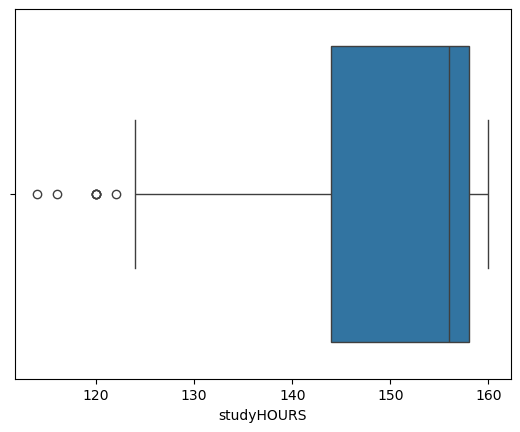

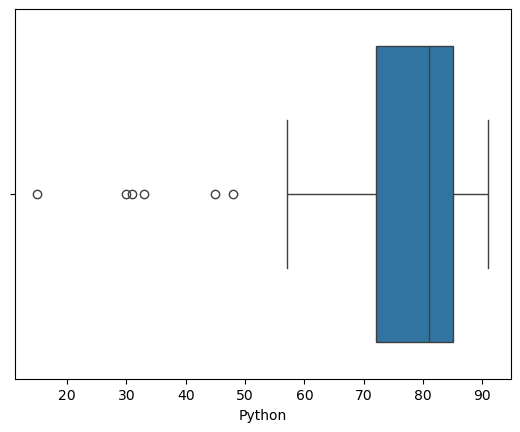

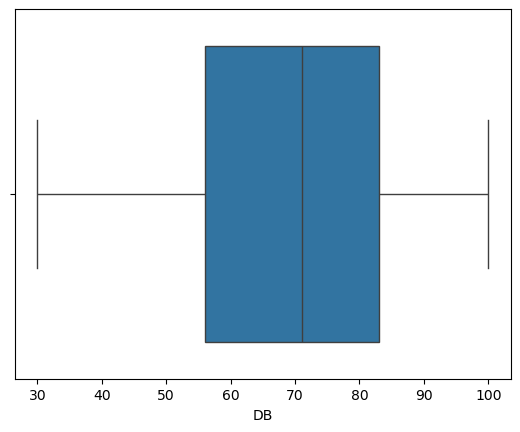

In [13]:
sns.boxplot(x=df['studyHOURS'])
plt.show()
sns.boxplot(x=df['Python'])
plt.show()
sns.boxplot(x=df['DB'])
plt.show()

In [21]:
# Remove unrealistic scores (<0 or >100)
df = df[(df['Python'].between(0,100)) & (df['DB'].between(0,100))]

df.shape

(77, 11)

In [22]:
# IQR method for studyHOURS
Q1 = df['studyHOURS'].quantile(0.25)
Q3 = df['studyHOURS'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR
df = df[(df['studyHOURS'] >= lower_bound) & (df['studyHOURS'] <= upper_bound)]


(70, 11)

In [25]:
df.shape



(70, 11)

## Save Cleaned Dataset

In [26]:
df.to_csv('cleaned_students.csv', index=False)

#  Data Cleaning and Preprocessing Report

## 1. Inconsistencies Found and Fixes

- **Gender column**  
  - Issues: Mixed formats such as `['Female', 'M', 'Male', 'F', 'female', 'male']`.  
  - Fix: Standardized values using `.str.lower()`, `.str.strip()`, and `.replace()` into two categories:  
    - `Male`  
    - `Female`

- **Country column**  
  - Issues: Mixed cases and abbreviations such as `['Norway', 'Rsa', 'Norge', 'norway', 'UK', 'Somali']`.  
  - Fix: Normalized with `.str.title()` and replaced known inconsistencies:  
    - `Rsa → South Africa`  
    - `Norge/norway → Norway`  
    - `UK → United Kingdom`  
    - `Somali → Somalia`

- **Previous Education column**  
  - Issues: Typos and inconsistent formatting such as `['HighSchool', 'Barrrchelors', 'diploma', 'DIPLOMA', 'Diplomaaa']`.  
  - Fix: Standardized values with `.str.title()` and replacements:  
    - `HighSchool → High School`  
    - `diploma/DIPLOMA/Diplomaaa → Diploma`  
    - `Barrrchelors → Bachelors`  
  - Final categories: `High School, Diploma, Bachelors, Masters, Doctorate`

- **Duplicates**  
  - Checked using `df.duplicated().sum()`.  
  - Duplicates were dropped with `df.drop_duplicates()`.  

---

## 2. Handling Missing Values

- **Inspection**:  
  - Found missing values using `df.isnull().sum()`.  
  - Only the **Python column** had 2 missing values.  

- **Strategy**:  
  - For numerical columns (Python, DB), mean or median imputation is appropriate.  
  - For this dataset, the **mean** was chosen for Python scores because it is more robust to outliers.  

---

## 3. Outlier Detection and Treatment

- **Detection**:  
  - Used boxplots (`sns.boxplot`) and summary statistics (`df.describe()`).  
  - Checked study hours and scores for unrealistic values (<0 or >100).  

- **Findings**:  
  - No values below 0.  
  - A few values above 100 in study hours were flagged as unrealistic.  

- **Treatment**:  
  - Applied the **IQR method** to detect and remove extreme outliers.  
  - Example code:  
    ```python
    Q1 = df["studyHOURS"].quantile(0.25)
    Q3 = df["studyHOURS"].quantile(0.75)
    IQR = Q3 - Q1
    df = df[~((df["studyHOURS"] < (Q1 - 1.5*IQR)) | (df["studyHOURS"] > (Q3 + 1.5*IQR)))]
    ```

---
